# Airbnb Regression

In [56]:
# import the libraries

%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

__________________
## Load Data

In [57]:
path = input("Path to data: ")
df_airbnb = pd.read_csv(path)

Path to data: data/test.csv


In [58]:
print(df_airbnb.columns)
df_airbnb.head()

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.00,Real Bed,flexible,False,NYC,...,40.83,-73.95,En suite room Upper West Side,Hamilton Heights,1,100.00,https://a0.muscache.com/im/pictures/90125799/6...,10031,1.00,1.00
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.50,Real Bed,moderate,True,DC,...,38.92,-77.03,Cozy or King BR in a grand victorian,Columbia Heights,146,96.00,https://a0.muscache.com/im/pictures/64128167/5...,20009,1.00,2.00
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.00,Real Bed,flexible,True,NYC,...,40.67,-73.95,COMFORTABLE & COZY-2 STOPS BARCLAY,Crown Heights,10,92.00,https://a0.muscache.com/im/pictures/56585377/e...,11225.0,1.00,1.00
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.00,Real Bed,flexible,False,NYC,...,40.67,-73.95,Sunny & Colorful Private BR in Crown Heights,Crown Heights,0,nan,https://a0.muscache.com/im/pictures/d76d0e9a-e...,11225.0,1.00,1.00
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.00,Real Bed,strict,True,NYC,...,40.74,-73.91,Lovely & Cozy Apartment in Queens!,Woodside,45,93.00,https://a0.muscache.com/im/pictures/435d8af0-f...,11377,2.00,3.00


______________________
## Missing Values

In [30]:
df_airbnb.isnull().sum()

id                           0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   67
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              5008
host_has_profile_pic        61
host_identity_verified      61
host_response_rate        5748
host_since                  61
instant_bookable             0
last_review               5001
latitude                     0
longitude                    0
name                         0
neighbourhood             2197
number_of_reviews            0
review_scores_rating      5272
thumbnail_url             2587
zipcode                    321
bedrooms                    28
beds                        46
dtype: int64

In [31]:
#Bathrooms
import math

bedrooms_grp = df_airbnb.groupby('bedrooms')['bathrooms'].median()
print(bedrooms_grp)

for idx, bedrm_n in enumerate(bedrooms_grp):
    print(bedrooms_grp.index[idx],"--",math.floor(bedrm_n))

#df_airbnb[df_airbnb['bedrooms'] == bedrm_n]
#df_airbnb['bathrooms'] = df_airbnb['bathrooms'].fillna(bedrooms_grp.index[df_airbnb['bedrooms']])


bedrooms
0.00    1.00
1.00    1.00
2.00    1.00
3.00    2.00
4.00    2.50
5.00    3.50
6.00    4.00
7.00    6.25
8.00    5.75
9.00    3.00
10.00   8.00
Name: bathrooms, dtype: float64
0.0 -- 1
1.0 -- 1
2.0 -- 1
3.0 -- 2
4.0 -- 2
5.0 -- 3
6.0 -- 4
7.0 -- 6
8.0 -- 5
9.0 -- 3
10.0 -- 8


In [5]:
# Review scores rating
'''
rsr_group = df_airbnb.groupby('number_of_reviews')['review_scores_rating']['id']
df_airbnb[df_airbnb['review_scores_rating'].isnull()]['number_of_reviews'].value_counts()


for n in rsr_group.index:
    rsr_df = df_airbnb[(df_airbnb['review_scores_rating'].isnull()) & (df_airbnb['number_of_reviews'] == n)]
    rsr_df['review_scores_rating'].fillna(rsr_group[n])
    #df_airbnb['review_scores_rating'] = rsr_df['review_scores_rating']

    
#df_airbnb['review_scores_rating'] = df_airbnb['review_scores_rating'].fillna(df_airbnb['number_of_reviews']*df_airbnb['review_scores_rating'].mean())
'''


Exception: Column(s) review_scores_rating already selected

_________________________________
## Feature Engineering

In [59]:
categorical=['property_type','room_type','bed_type','cancellation_policy', 'city']
df_dummies=pd.get_dummies(df_airbnb[categorical])

new_df = pd.concat([df_airbnb, df_dummies], axis=1)

In [60]:
print(new_df.columns)
new_df.info()

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Casa particular',
       'property_type_Castle', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Hut',
       'property

______________________________
## Train the Models

In [61]:
X_columns = ['accommodates', 'number_of_reviews'] + list(df_dummies.columns)
y_column = ['log_price']

# handle missing values
df_train = new_df[X_columns + y_column]
print(df_train.shape)

(23111, 52)


In [48]:
# Split

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 54)
y_train (40800, 1)
X_test (10200, 54)
y_test (10200, 1)


In [62]:
# Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(df_train)

ValueError: shapes (51000,55) and (54,1) not aligned: 55 (dim 1) != 54 (dim 0)

In [50]:
# Random Forest

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

C:\Users\A-Sha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\A-Sha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [51]:
kn_model = KNeighborsRegressor(10)
kn_model.fit(X_train, y_train)
kn_pred = kn_model.predict(X_test)

_________________
## Models Evaluations

RMSE 0.49634957676275826


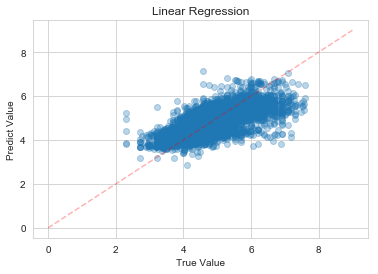

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print('RMSE', rmse)
plt.scatter(y_test, lr_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

RMSE 0.5076621035071726


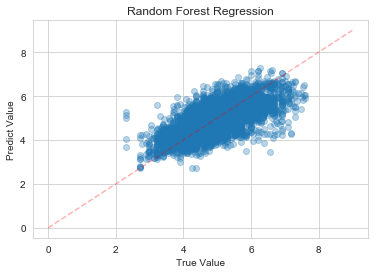

In [53]:
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print('RMSE', rmse)
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Random Forest Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

RMSE 0.5077259956949518


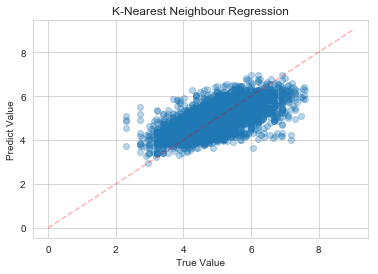

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, kn_pred))
print('RMSE', rmse)
plt.scatter(y_test, kn_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('K-Nearest Neighbour Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

______________________
## Prepare Submission

In [ ]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

In [ ]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression.csv', index=False)